In [2]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataloader.dataloader import get_dataloader


## Data Exploration

In [3]:
# Load the CSV data into a DataFrame
df = pd.read_csv('../data/AirPassengers.csv')
df[['year', 'month']] = df['date'].str.split('-', expand=True)

# Convert 'year' and 'month' to numeric
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])
# Display the first few rows of the DataFrame
df.head()

,date,passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2
2,1949-03,132,1949,3
3,1949-04,129,1949,4
4,1949-05,121,1949,5


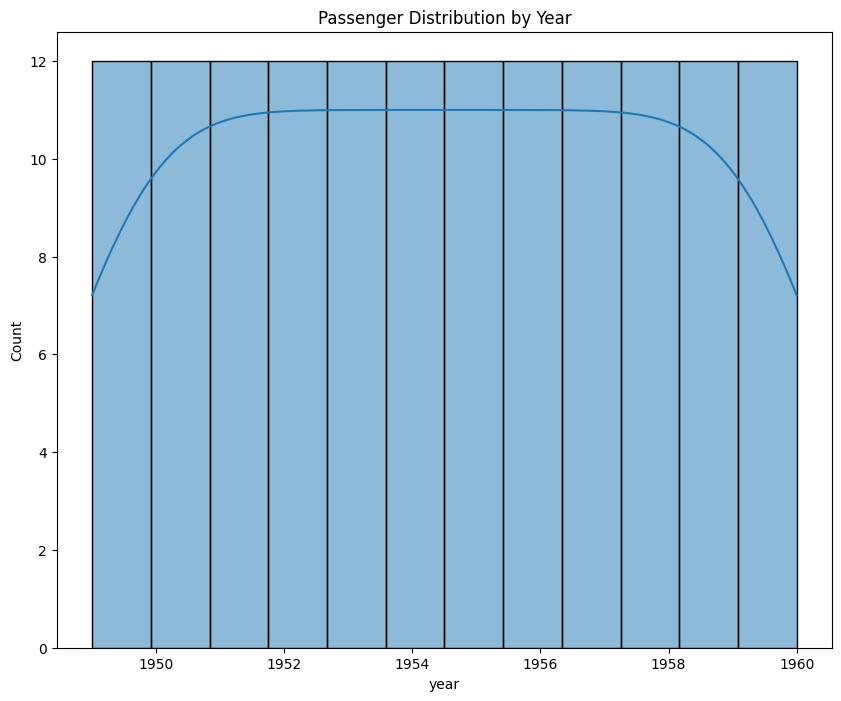

In [4]:
# Create a histogram of the 'year' column
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='year', bins=12, kde=True)
plt.title('Passenger Distribution by Year')
plt.show()

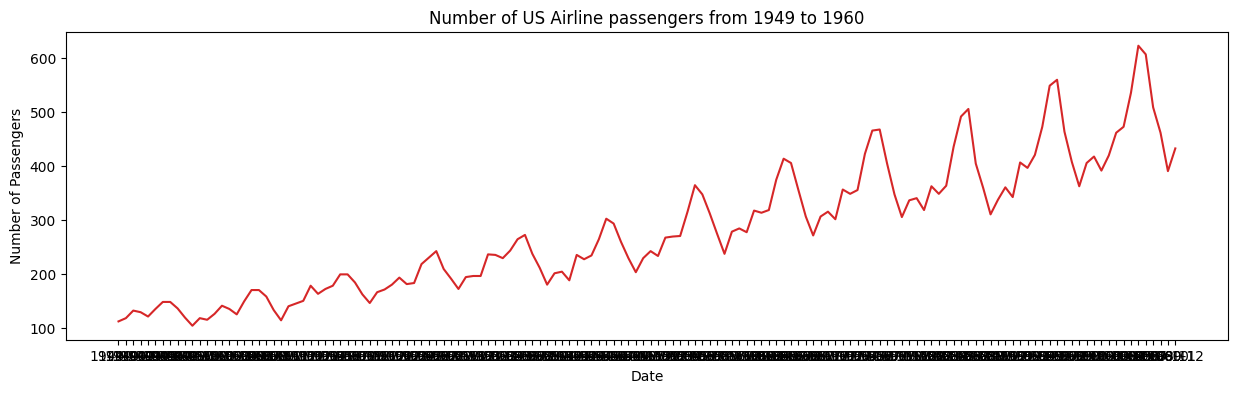

In [5]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['date'], y=df['passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [9]:
data = df['passengers'].to_numpy()
slidingDataloader = get_dataloader(data, batch_size=6, window_size=6)

tensor([[112, 118, 132, 129, 121, 135],
        [118, 132, 129, 121, 135, 148],
        [132, 129, 121, 135, 148, 148],
        [129, 121, 135, 148, 148, 136],
        [121, 135, 148, 148, 136, 119],
        [135, 148, 148, 136, 119, 104]]) tensor([148, 136, 119, 104, 118, 115])


In [ ]:
for x, y in slidingDataloader:
    print(x, y)
    break